# Exploratory analysis substations

### Libraties and data source

In [16]:
# import libraries
import matplotlib as mpl
import pandas as pd
import numpy as np
import datetime as dt
import time as tm
import pylab

# plotting
import matplotlib.pyplot as plt

## Data Frame Basic

In [4]:
dataDir = ("C:/Users/miha/Desktop/Programming/test1/")
df = pd.read_csv(dataDir + "zigbee1.csv", parse_dates = True)
#df.head()


### Merge dataframes zigbee1 & zigbee2

In [15]:
# Loading first file dataframe as df1
dataDir = ("C:/Users/miha/Desktop/Programming/test1/")
df1 = pd.read_csv(dataDir + r"zigbee1.csv")

# Loading second file dataframe as df2
dataDir = ("C:/Users/miha/Desktop/Programming/test1/")
df2 = pd.read_csv(dataDir + r"zigbee2.csv")

#convert epoch time to datetime
df2.index = pd.to_datetime(df2['Timestamp'], unit='s')
df2.index.day

df1.index = pd.to_datetime(df1['Timestamp'], unit='s')
df1.index.day

#Meriging dataframes by timestamp (index)
df3=pd.concat([df1,df2], axis=1)

#rename columns
df3.rename(columns={'ch0_zigbee1': 'voltage', 'ch1_zigbee1': 'current1', 'ch0_zigbee2': 'current2', 'ch1_zigbee2': 'current3'}, inplace=True)

##Add new derivatives (Power1,2,3,)
df3['PW1'] = df3['voltage'] * df3['current1']
df3['PW2'] = df3['voltage'] * df3['current2']
df3['PW3'] = df3['voltage'] * df3['current3']

## resampling df
idx = pd.date_range(start=df3.index.min(),end=df3.index.max(), freq="1s")
df = df3.reindex(idx)
df.drop("Timestamp", 1, inplace=True)  # delete timestamp clums as a htey are redundant


#Adding Time tags
#df['month'] = df.index.month
#df['day'] = df.index.dayofweek
#df['hour'] = df.index.hour
#df['min'] = df.index.minute
#df['sec'] = df.index.second




In [17]:
df


,voltage,current1,current2,current3,PW1,PW2,PW3
2017-11-27 07:07:53,NaN,219.714292,NaN,NaN,NaN,NaN,NaN
2017-11-27 07:07:54,785.533454,221.714292,243.444846,1360.571437,174163.993704,191234.070463,1.068774e+06
2017-11-27 07:07:55,788.856238,220.428578,254.294755,1375.785722,173886.458850,200602.004160,1.085297e+06
2017-11-27 07:07:56,789.737794,218.357149,224.864376,1346.857151,172444.893367,177583.895848,1.063664e+06
2017-11-27 07:07:57,792.958860,205.642864,208.657323,1334.500008,163066.330829,165456.673212,1.058204e+06
2017-11-27 07:07:58,793.026672,213.000007,179.091320,1304.357151,168914.686396,142024.193204,1.034390e+06
2017-11-27 07:07:59,791.195750,209.642864,185.872513,1282.285722,165868.542781,147061.542394,1.014539e+06
2017-11-27 07:08:00,788.652803,218.000007,NaN,1298.785722,171926.316118,NaN,1.024291e+06
2017-11-27 07:08:01,788.957956,217.357149,206.894213,1313.142865,171485.652370,163230.835355,1.036015e+06
2017-11-27 07:08:02,788.856238,215.214292,NaN,1326.500008,169773.137029,NaN,1.046418e+06


## Data auditing

## voltage overview

## Plots

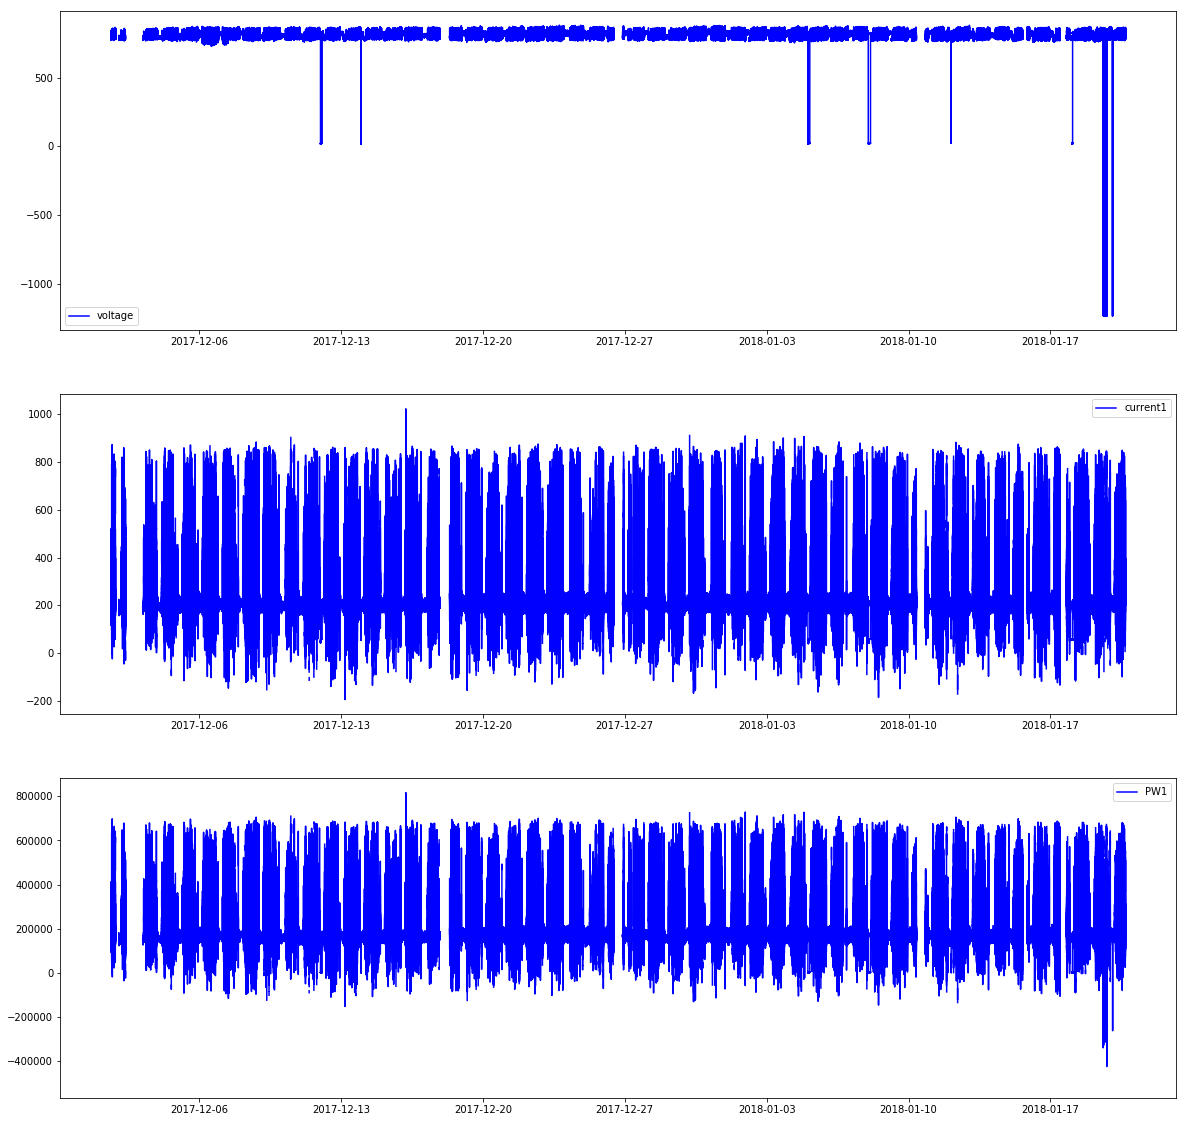

In [19]:
_ = df[["voltage","current1", 'PW1']]["2017-12-01 15:50:00":"2018-01-20 16:50:00"].plot(subplots=True, layout=(3,1), style=['b','b','b'], 
                                                       figsize=(20,20), x_compat=True, sharex=False)     

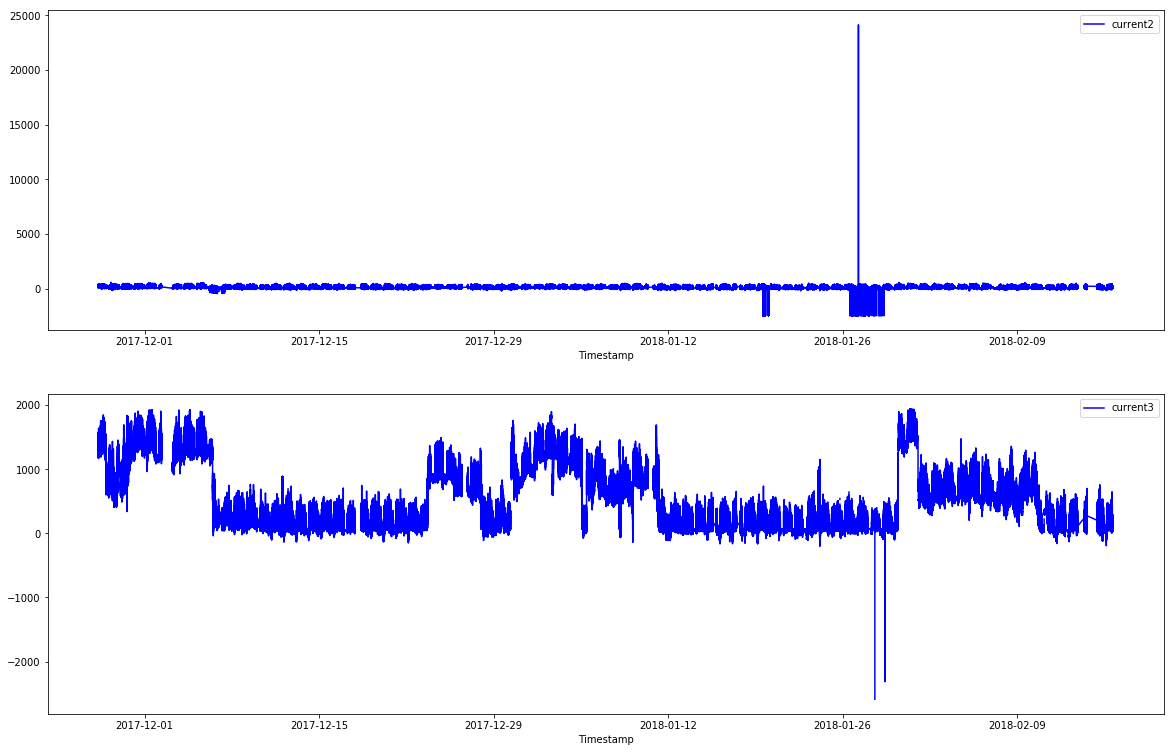

In [12]:
##plot current2 & current#3
_ = df2[["current2","current3"]].plot(subplots=True, layout=(3,1), style=['b','b','b'], 
                                                       figsize=(20,20), x_compat=True, sharex=False) 

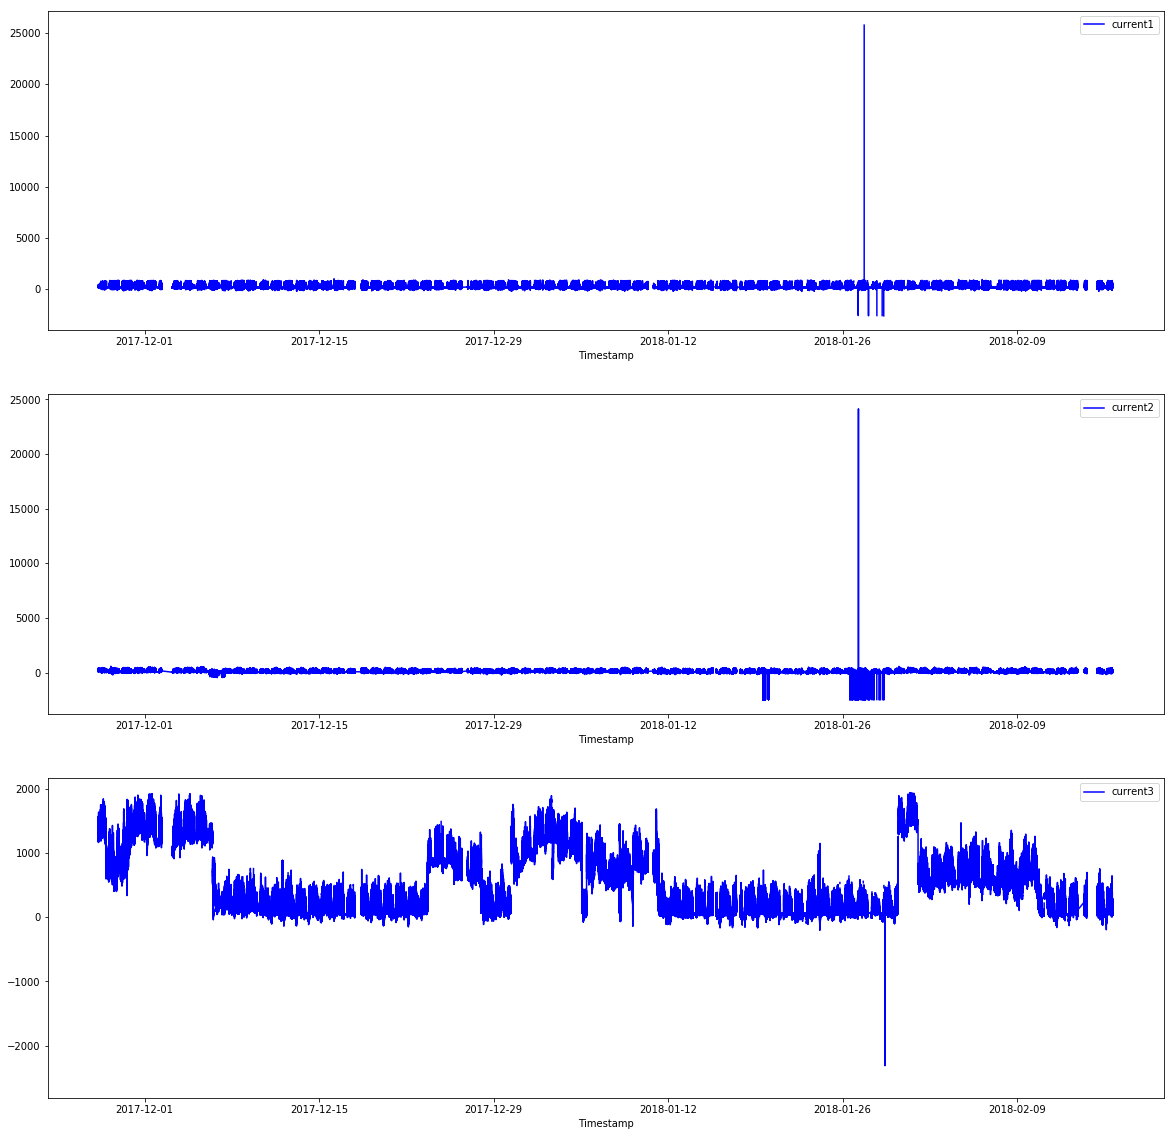

In [60]:
_ = df[["current1", 'current2', 'current3']].plot(subplots=True, layout=(3,1), style=['b','b','b'], 
                                                       figsize=(20,20), x_compat=True, sharex=False) 

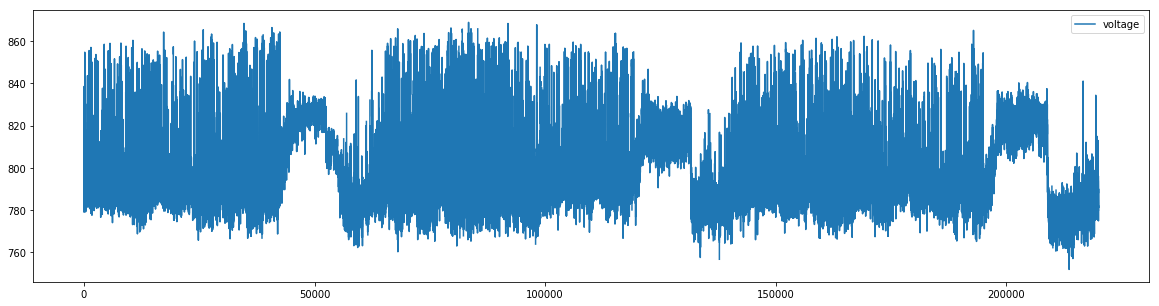

In [20]:
#hourly chart
a = 0
b = 140000+140000
df[a:b][["voltage"]].plot(layout=(3,1), figsize=(20,5), x_compat=True, sharex=False)

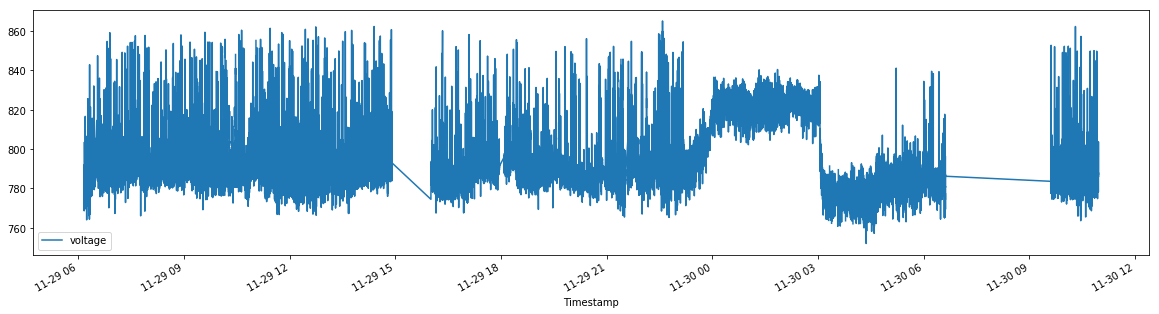

In [26]:
#daily chart
a = 140000
b = a + 86400
df[a:b][["voltage"]].plot(layout=(3,1), figsize=(20,5), x_compat=True, sharex=False)

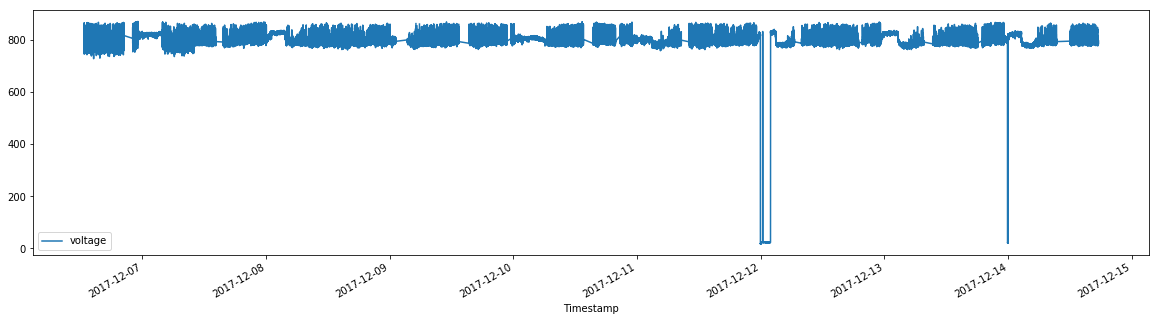

In [13]:
#weekly chart
a = 604800
b = a + 604800
df[a:b][["voltage"]].plot(layout=(3,1), figsize=(20,5), x_compat=True, sharex=False)